# Geodatenanalyse 1

## Tag 2 / Block 2 / Übung 4: Bivariate Statistik

Nach der Betrachtung einzelner Parameter gestern, geht es in dieser Übung um die Untersuchung der Beziehung zwischen zwei Parametern. 

Dazu lesen wir zunächst einen Teil des Datensatz mit den Grundwasserparametern aus Koch et al. (2020) von gestern in Python ein. Am einfachsten geht das mit dem `pandas` Package (dazu mehr in den nächsten Tagen). 


In [1]:
# [1] hier Code eingeben
import pandas as pd
data = pd.read_csv('Data_GW_KA_short.csv', sep=';', encoding='cp1252')

### Explorative Datenanalyse: Histogramme und Scatterplots

Mit einem neuen Datensatz konfrontiert, ist es sinnvoll sich zuerst visuell einen Überblick über die vorliegenden Parameter, Werte und empirischen Verteilungen zu verschaffen. Für jeden Parameter einzeln geht dies gut über ein Histogramm. 

Erstellt daher zunächst eine einfache Abbildung mit einem Histogram der Sauerstoffsättigung (`data["Sauerstoff"]`) mit Hilfe von `matplotlib.pyplot.hist()`.


Text(0, 0.5, 'Häufigkeit')

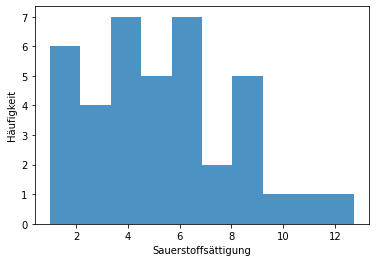

In [2]:
# [2] hier Code eingeben
from matplotlib import pyplot as plt
plt.hist(data['Sauerstoff'], alpha = 0.8)
plt.xlabel('Sauerstoffsättigung')
plt.ylabel('Häufigkeit')

Um die Histogramme (d.h. Randverteilungen) zweier Parameter zusammen mit ihrem gemeinsamen Scatterplot darzustellen, gibt es in `seaborn` die praktische Funktion `seaborn.jointplot()`. `seaborn` ist wie `matplotlib` bereits in Anaconda enthalten und bietet viele spezielle Funktionen zur Visualisierung von statistischen Daten.

Importiert `seaborn` in Euer Notebook und probiert `jointplot(x, y)` mit einem beliebigen Parameterpaar aus dem Datensatz aus. 

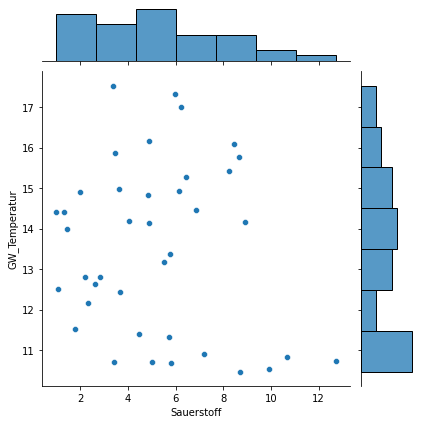

In [3]:
# [3] hier Code eingeben
import seaborn as sns
sns.jointplot(data['Sauerstoff'], data['GW_Temperatur'])
plt.xlabel('Sauerstoffsättigung')
plt.ylabel('Grundwassertemperatur')
plt.show()

Um einen Überblick über die bivariaten Beziehungen in dem gesamten Datensatz zu bekommen, eignet sich die Funktion `seaborn.pairplot()`, die Histogramme und Scatterplots für einen Datensatz kombiniert. Probiert diese Funktion mal für die Grundwasserdaten aus, und macht Euch ein erstes Bild der Beziehungen zwischen den Parameterpaaren. 

Achtung: Je nach Rechenleistung kann das Ausführen des Codes ein paar Sekunden dauern. 

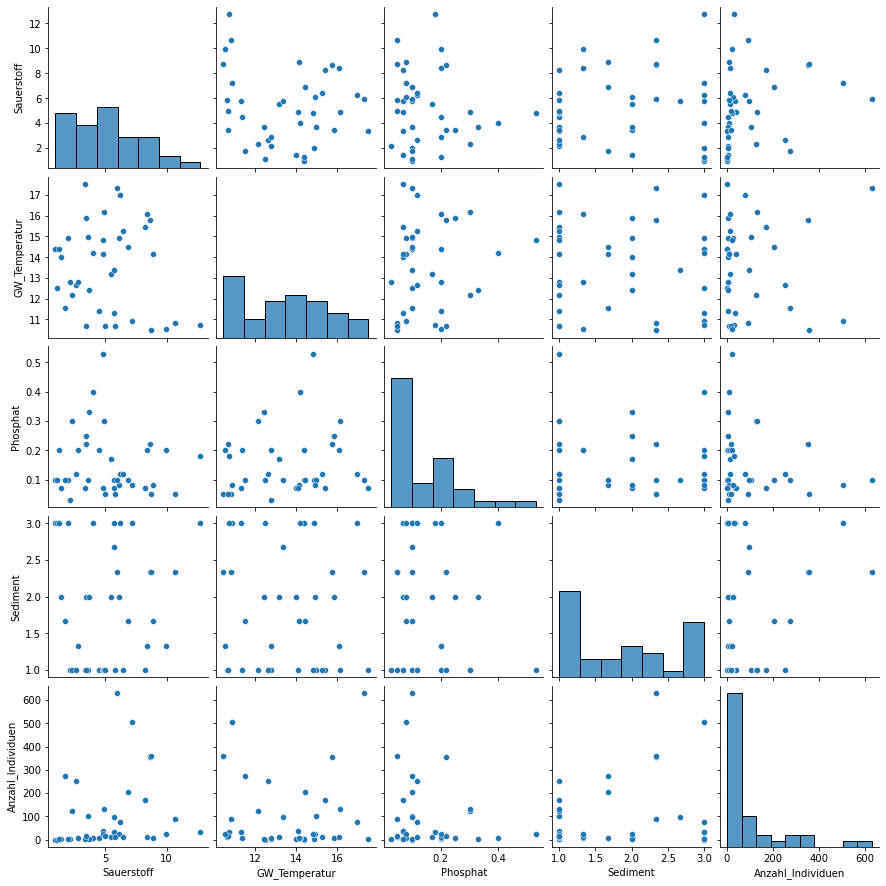

In [4]:
# [4] hier Code eingeben
import seaborn as sns
sns.pairplot(data)
plt.show()

### Korrelationskoeffizienten

Nun wollen wir die Beziehungen zwischen den einzelnen Parametern noch genauer qunatifizieren. Das grundlegende Maß dafür ist die Kovarianz. 

<img src="https://latex.codecogs.com/gif.latex?cov_{xy}&space;=&space;\frac{1}{1-n}\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})" title="cov_{xy} = \frac{1}{1-n}\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})" />

Um die Kovarianzen für alle Parameterpaare in einem Datensatz zu berechnen, gibt es in `pandas` die Funktion `pandas.DataFrame.cov()`. Nutzt diese um Euch die Kovarianzen aller Parameterpaare der Grundwasserdaten, also die Kovarianzmatrix, anzeigen zu lassen. Zwischen welchen Paaren lassen sich Beziehungen erkennen?

In [5]:
# [5] hier Code eingeben
cov_matrix = data.cov()
print(cov_matrix)

                   Sauerstoff  GW_Temperatur  Phosphat   Sediment  \
Sauerstoff           8.209471      -0.862375 -0.029748   0.141498   
GW_Temperatur       -0.862375       4.440565  0.029929  -0.013659   
Phosphat            -0.029748       0.029929  0.011623  -0.006913   
Sediment             0.141498      -0.013659 -0.006913   0.648204   
Anzahl_Individuen   97.744211      16.880526 -2.753158  17.569737   

                   Anzahl_Individuen  
Sauerstoff                 97.744211  
GW_Temperatur              16.880526  
Phosphat                   -2.753158  
Sediment                   17.569737  
Anzahl_Individuen       22199.736842  


Die Stärke der Beziehungen zwischen den Parameterpaaren lässt sich aufgrund der sehr unterschiedlichen Varianzen (s. Diagonale der Kovarianzmatrix), allerdings nur schwer vergleichen. Berechnet nun für ein Parameterpaar, z.B. mit einer sehr großen Kovarianz, den Korrelationskoeffizienten nach Pearson, in dem Ihr die entsprechende Kovarianz durch das Produkt der Standardabweichungen teilt. 

Um die Korrelationsmatrix zu berechnen, gibt es in `pandas` den praktischen Befehl `pandas.DataFrame.corr()`. Per default wird dabei ebenfalls der Koeffizient nach Pearsion berechnet. Was lässt sich also über die Korrelationen sagen? Vergleicht die Korrelationen ausdem mit den Kovarianzen von oben! 

In [6]:
# [6] hier Code eingeben
corr_matrix = data.corr()
print(corr_matrix)

                   Sauerstoff  GW_Temperatur  Phosphat  Sediment  \
Sauerstoff           1.000000      -0.142830 -0.096302  0.061339   
GW_Temperatur       -0.142830       1.000000  0.131738 -0.008051   
Phosphat            -0.096302       0.131738  1.000000 -0.079638   
Sediment             0.061339      -0.008051 -0.079638  1.000000   
Anzahl_Individuen    0.228960       0.053764 -0.171394  0.146466   

                   Anzahl_Individuen  
Sauerstoff                  0.228960  
GW_Temperatur               0.053764  
Phosphat                   -0.171394  
Sediment                    0.146466  
Anzahl_Individuen           1.000000  


Leider lassen sich mit dieser Funktion nicht die p-Werte der Koeffizienten ausgeben. Dies geht z.B. über `scipy.stats.pearsonr()`, wobei als Outputs der Korrelationskoeffizient und der p-Wert für ein bestimmtes Parameterpaar (*x*, *y*) angegeben werden. Testet dies für das Parameterpaar Grundwassertemperatur und Sauerstoff, und interpretiert den p-Wert.  

In [7]:
# [7] hier Code eingeben
from scipy import stats
r, p = stats.pearsonr(data['Sauerstoff'],data['GW_Temperatur'])
print (r, p)

-0.14283008058163388 0.3857161244717707


Generell sind die Korrelationen in dem Datensatz sehr niedrig, was daran liegen könnte, dass es zwischen den Parametern keine lineare Beziehungen, sondern komplexere Assoziationen gibt. Berechnet nun den Korrelationskoeffizienten und den dazugehörigen p-Werten über die Funktion `scipy.stats.spearmanr()`. Wie verhalten sich die Werte im Vergleich zu oben?

In [8]:
# [8] hier Code eingeben
r, p = stats.spearmanr(data['Sauerstoff'],data['GW_Temperatur'])
print (r, p)

-0.06316748567026838 0.7024405123948583


Wie in der Vorlesung erwähnt gibt es noch einen dritten häufig verwendeten Korrelationskoeffizienten, der besonders für diskrete Daten geeignet ist. Wählt aus dem Datensatz einen diskreten Parameter aus, und bestimmt mit Hilfe von `scipy.stats.kendalltau()` die Korrelation zu einem weiteren beliebigen Parameter. Überprüft danach ob und wie sich die drei Korrelationskoeffizienten für dieses Parameterpaar unterscheiden. 

In [9]:
# [9] hier Code eingeben
r_pear, p_pear = stats.pearsonr(data['Sediment'],data['Anzahl_Individuen'])
r_spear, p_spear = stats.spearmanr(data['Sediment'],data['Anzahl_Individuen'])
r_tau, p_tau = stats.kendalltau(data['Sediment'],data['Anzahl_Individuen'])
print (r_pear, p_pear, r_spear, r_tau, p_tau)

0.14646557616592315 0.3736111785965318 -0.07098288249384602 -0.05154355799732965 0.6701212825532348


Zur Visualisierung von Werten in Matrizen bieten sich sog. heatmaps an. Ganz einfach geht dies mit der Funktion `seaborn.heatmap()`. Mit dem zusätzlichen Argument `annot=True` könnt Ihr Euch auch die Zahlenwerte in den Kästchen für eine der Matrizen oben anzeigen lassen. 

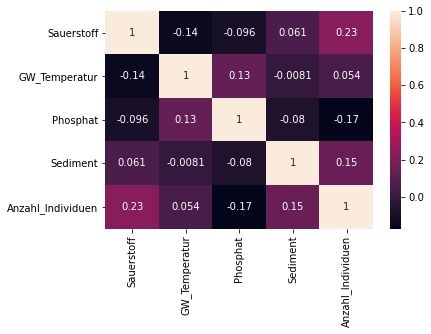

In [10]:
# [10] hier Code eingeben
sns.heatmap(corr_matrix, annot=True)
plt.show()

Wenn Ihr noch Zeit habt, gibt es eine schöne Galerie mit Beispielen zu Datenvisualisierung mit seaborn (https://seaborn.pydata.org/examples/index.html), die es sich anzuschauen lohnt. 


Im Anschluss geht es dann mit noch mehr Dimensionen weiter ...

## Ende

### Referenzen: 

Koch et al. (2020), Groundwater fauna in an urban area: natural or affected? https://hess.copernicus.org/preprints/hess-2020-151/hess-2020-151.pdf
